<a href="https://colab.research.google.com/github/schaidez2727/MAT-421/blob/main/ModuleF_MAT421_Chaidez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module F (HW 7) - MAT 421 #
#### Santana Chaidez ####

____
## Numerical Differentiation Problem Statement ##
___

* **Function derivatives** allow us to model changes in engieering and scientific systems over space, time, and toher dimensions of interest
* However, these functions are often unknown or represented implicitly by a dataset
* Computing derivatives **numerically** allows us to *approximate* the derivative by using **discrete** points to represent the function

**Numerical Grid**
* An evenly-spaced set of points over the domain of a function, over some interval
* For a numerical grid *x*, *x*_*j* is the *j*th point in the grid

**Spacing / Step Size**
* The distance between adjacent points on the **numerical grid**
* Often denoted as *h*

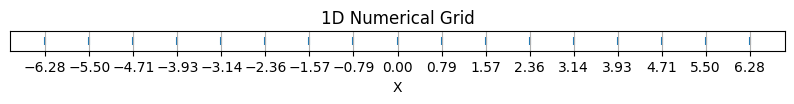

In [2]:
# Example of using Python to generate a numerical grid

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(-2*np.pi, 2*np.pi, 17)
# set spacing and independent values of numerical grid

# Plot x as 1D numerical grid
plt.figure(figsize=(10, 0.25))
plt.scatter(x, np.zeros(len(x)), marker='|')
plt.xticks(x)
plt.yticks([])
plt.xlabel('X')
plt.title('1D Numerical Grid')
plt.grid(True)
plt.show()

____
## Finite Difference Approximating Derivatives ##
___

* The derivative of a function f(x) at the point x = a is the *slope* at that point
* For a **finite difference approximation** of this slope, values of f(x) around/neighboring the point x = a can be used to approximate the slope at x = a
* The following **finite difference formulas** calculate the derivative using the values of *two points*

**Forward Difference**
* Estimate the slope of the function f(x) at x*j* using the line that connects points (x*j* , f(x*j*)) and (x*j+1* , f(x*j+1*))
* f'(x*j*) = [ f(x*j+1*) - f(x*j*) ] / [ x*j+1* - x*j* ]

**Backward Difference**
* Estimate the slope of the function f(x) at x*j* using the line that connects points (x*j-1* , f(x*j-1*)) and (x*j* , f(x*j*))
* f'(x*j*) = [ f(x*j*) - f(x*j-1*) ] / [ x*j* - x*j-1* ]

**Central Difference**
* Estimate the slope of the function f(x) at x*j* using the line that connects points (x*j-1* , f(x*j-1*)) and (x*j+1* , f(x*j+1*))
* f'(x*j*) = [ f(x*j+1*) - f(x*j-1*) ] / [ x*j+1* - x*j-1* ]

This can be expanded upon to derive an approximation of the derivative of f(x) using **Taylor Series**:
* Utilising the uniform step size h, the Taylor series can be taken for f(x) at specifed points
* The higher-order terms - denoted as O(h) - can be truncated based on desired accuracy
* The equations can then be rearranged to solve for the derivative at a = x*j*, f(x*j*)

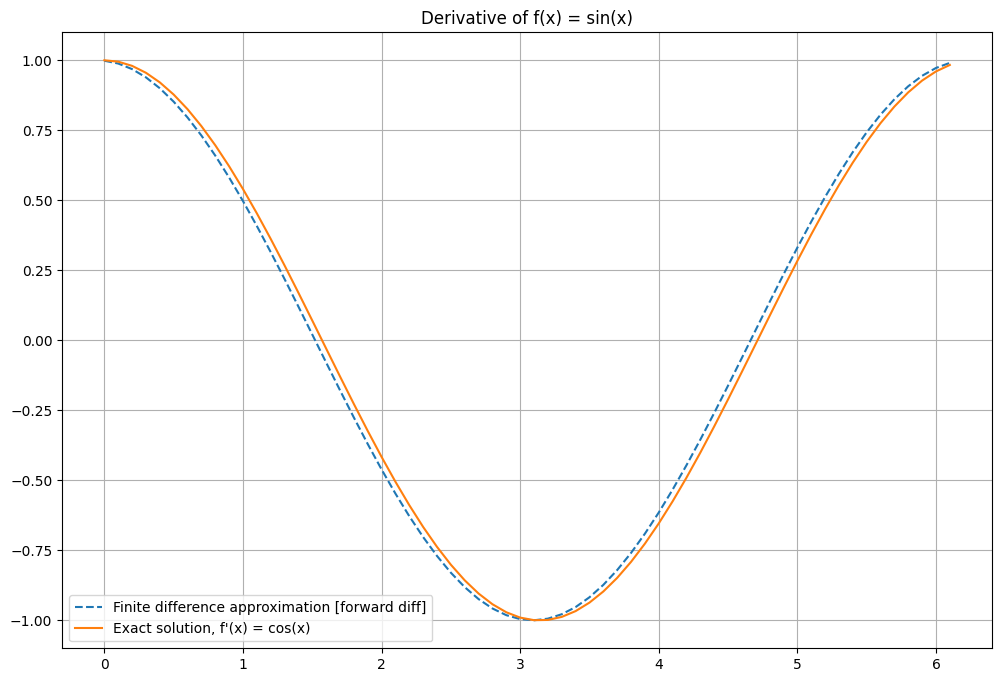

Max Error: 0.04997515074549317


In [5]:
# Example of using forward difference to approximate a derivative in Python

h = 0.1 # step size
x = np.arange(0, 2*np.pi, h) # define grid
y = np.sin(x) # compute function f(x) = sin(x)

forward_diff = np.diff(y)/h # compute vector of forward differences
x_diff = x[:-1:] # compute corresponding grid
exact_sol = np.cos(x_diff) # compute exact solution, f'(x) = cos(x)

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x_diff, forward_diff, '--', label = 'Finite difference approximation [forward diff]')
plt.plot(x_diff, exact_sol, label = "Exact solution, f'(x) = cos(x)")
plt.title('Derivative of f(x) = sin(x)')
plt.legend()
plt.grid(True)
plt.show()

# Compute max error between numerical derivative and exact solution
max_error = max(abs(exact_sol - forward_diff))
print('Max Error: ' + str(max_error))

* Small error (max error ~ 0.05) indicates an effective approximation for the derivative of f(x) = sin(x)!
* Error should also decrease with the step size

____
## Approximating of Higher Order Derivatives ##
___

* Can also use **Taylor series** to approximate higher order derivatives (i.e. f'', f''', f^(4), etc.)
* Done by taking the Taylor series around point of interest a = x*j* and surrounding points x = x*j-1* and x = x*j+1*, then *rearranging* the resulting equations similarly to how we solved for the first derivative above!
* To demonstrate...

Computing the Taylor series as x*j-1* and x*j+1* and adding then produces the equation:

f(x*j-1*) + f(x*j+1*) = 2f(x*j*) + h^2f''(x*j*) + h^4f''''(x*j*)/24 + ...

Rearranging this equation gives us the **approximation for f''(x*j*)**:

f''(x*j*) ~= [ f(x*j+1*) - 2f(x*j*) + f(x*j+1*) ] / h^2

____
## Numerical Differentiation with Noise ##
___

* Data can sometimes be contaminated with **noise**
* This means its value is *off* by a small amount when compared to the purely mathematical calculation
* Can occur due to inaccuracies in measuring devices, or due to the modification of data by external factors (factors outside the system of interest)
* Even if the effect of the noise on the raw data is small, its effect on our approximation of the derivative can be quite significant

Let's illustrate the effects of noise using our previous function, f(x) = sin(x):

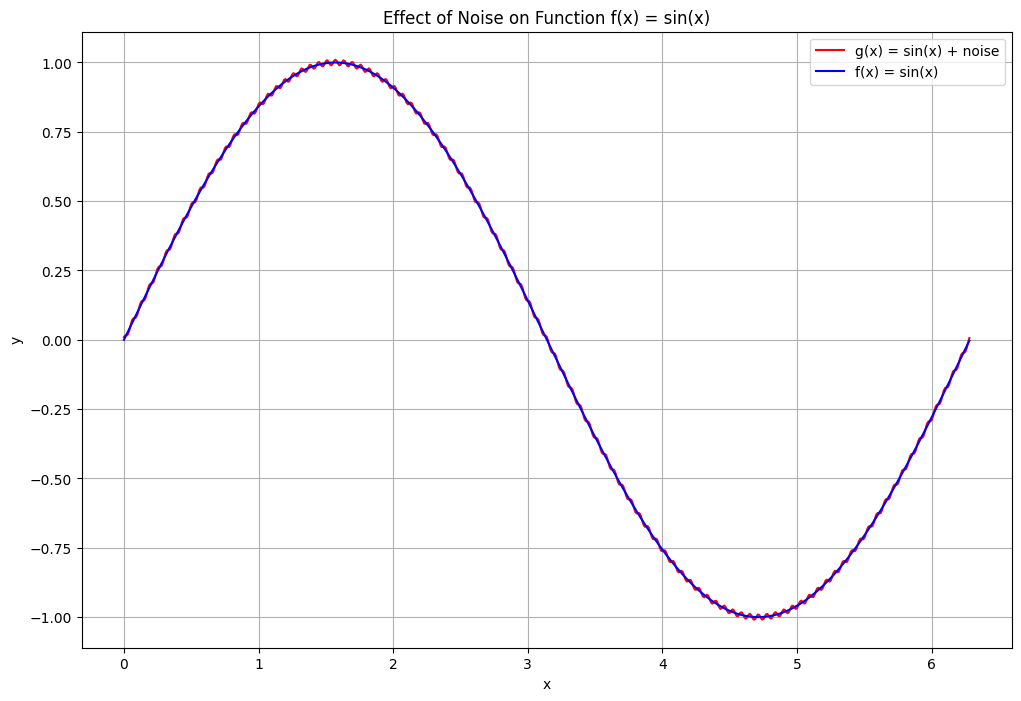

In [10]:
# Corrupting our previous numerically computed derivative with noise

x = np.arange(0, 2*np.pi, 0.01) # set grid and step size

# Compute function with noise
omega = 100 # coefficient of x for cosine wave (large)
epsilon = 0.01 # coefficient of cosine wave (small)

y = np.sin(x) # original function, f(x) = sin(x)
y_noise = y + epsilon*np.cos(omega*x) # adding noise using small cosine wave

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x, y_noise, 'r-', label = 'g(x) = sin(x) + noise')
plt.plot(x, y, 'b-', label = 'f(x) = sin(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Effect of Noise on Function f(x) = sin(x)')
plt.grid(True)
plt.legend()
plt.show()

* As we can see, the effect of the noise on the function itself is small.
* For small epsilon values (so small noise corruption), f(x) ~= g(x).

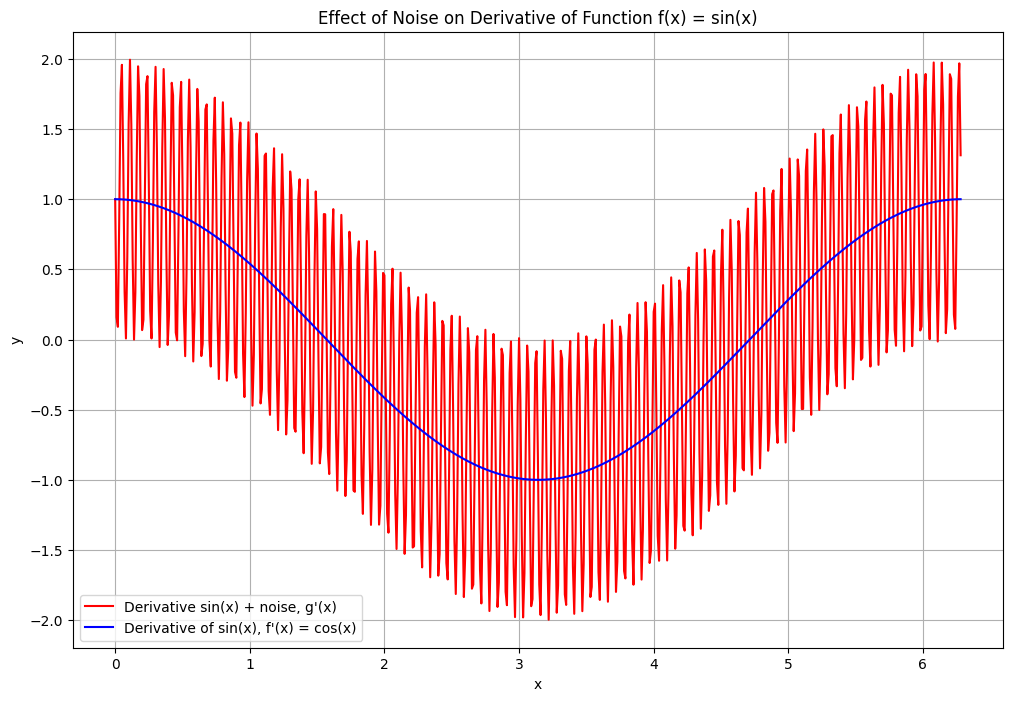

In [13]:
# Using Python to demonstrate the effect of noise on the numerical computation of a derviative

x = np.arange(0, 2*np.pi, 0.01) # set grid and step size

# Compute derivative of function with noise
y_diff = np.cos(x) # derivative of f(x) w/o noise, f'(x) = cos(x)
y_diff_noise = y_diff - epsilon*omega*np.sin(omega*x) # derivative of f(x) w/ noise
# g'(x) = cos(x) - epsilon*omega*sin(omega*x)

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x, y_diff_noise, 'r-', label = "Derivative sin(x) + noise, g'(x)")
plt.plot(x, y_diff, 'b-', label = "Derivative of sin(x), f'(x) = cos(x)")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Effect of Noise on Derivative of Function f(x) = sin(x)')
plt.grid(True)
plt.legend()
plt.show()

* As we can see, the noise exhibits a significant contribution to the derivative of the function.
* For many applications, the numerical derivative of the noisy function would *not* be usable!
* Thus, noisy data may hinder one's ability to compute the approximate/numerical derivative for the data using finite differences.